# Project name: Civil Servants Remuneration in the EU
## Part 2: EU Civil Servant average salary
### Step 2: Data visualization

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load data
df_salary = pd.read_csv('/Users/home/Documents/GitHub/Civil_Servant_Salary_EU/modified_data/2. EU Civil Servant average salary.csv')

In [3]:
df_salary[df_salary['value'] == df_salary['value'].min()]

,time,geo,value
10,2014,Croatia,0.0
22,2014,Romania,0.0
25,2014,Finland,0.0
38,2015,Croatia,0.0
66,2016,Croatia,0.0


<Figure size 1440x360 with 0 Axes>

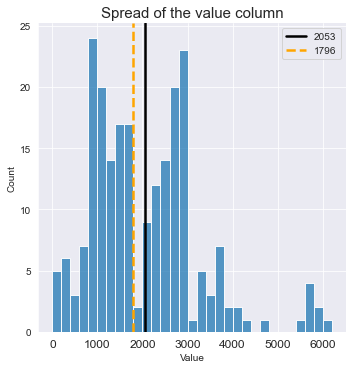

In [23]:
# check the distribution of data
## Create bins with step-size 5
bins = np.arange(df_salary['value'].min(), df_salary['value'].max()+200, 200)
plt.figure(figsize=[20,5])

sns.displot(x=df_salary['value'], bins=bins)
plt.axvline(df_salary['value'].mean(), c='k', ls='-', lw=2.5, label='{:.0f}'.format(df_salary['value'].mean()))
plt.axvline(df_salary['value'].median(), c='orange', ls='--', lw=2.5, label='{:.0f}'.format(df_salary['value'].median()))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Spread of the value column', fontsize=15)
plt.xticks(fontsize=12)
plt.legend()
plt.show();

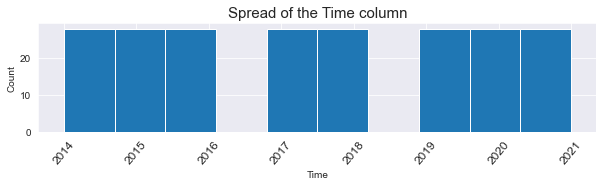

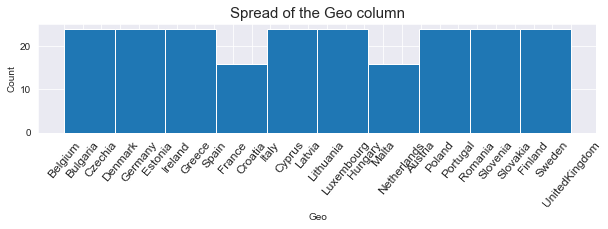

In [25]:
# loop through the qualitative data columns to check the spread
for i in range(0, 2):
    x = df_salary.columns[i]
    plt.figure(figsize=[10,2])
    plt.hist(data=df_salary, x=x)
    plt.xlabel(f'{x.title()}')
    plt.ylabel('Count')
    plt.title(f'Spread of the {x.title()} column', fontsize=15)
    plt.xticks(rotation=50, fontsize=12)
    plt.show();

#### View the level of average salaries by increments of 25%

In [5]:
# group data by geolocation
df_total = df_salary.groupby("geo", as_index=False)["value"].mean()

In [41]:
# check the bin values by increments of 25%
df_total.describe()[3:]

# assign the bins
bin_edges = [df_total.describe()[3:].values[0], # min values
             df_total.describe()[3:].values[1], # 25% value
             df_total.describe()[3:].values[2], # 50% value
             df_total.describe()[3:].values[3], # 75% value
             df_total.describe()[3:].values[4]] # max values
bin_labels = ['low', 'mid-low', 'mid-high', 'high']



<AxesSubplot:xlabel='geo', ylabel='value'>

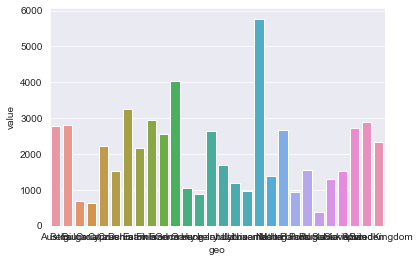

In [7]:
sns.barplot(x="geo",
            y="value",

           data=df_total)